In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [6]:
dataset = pd.read_csv('data-shoppers.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
lb = LabelEncoder()
dataset['Month'] = lb.fit_transform(dataset['Month'])
dataset.dropna(inplace=True)
print(dataset['Month'])

0        2
1        2
2        2
3        2
4        2
        ..
12325    1
12326    7
12327    7
12328    7
12329    7
Name: Month, Length: 12316, dtype: int64


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
le = LabelEncoder()
X[:, 16] = le.fit_transform(X[:, 16])
print(X[:,16])

[0 0 0 ... 1 0 1]


In [10]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X[:,15])

[1 2 1 ... 2 2 2]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8603 sha256=1916c618dacee759517aa1be0ac4259c7e2fd1040860f66cd881d206d53fbad2
  Stored in directory: /home/daramariabs/.cache/pip/wheels/b2/b8/f9/08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built MiniSom
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.05263158,
        0.        ],
       [0.        , 0.        , 1.        , ..., 1.        , 0.10526316,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.63157895,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.25      , 0.52631579,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.05263158,
        1.        ]])

In [16]:
from minisom import MiniSom
som = MiniSom(x = 30, y = 30, input_len = 19, sigma = 4.0, learning_rate = 0.8)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

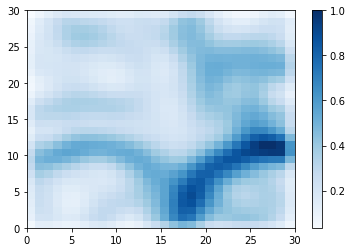

In [21]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T, cmap='Blues')
colorbar()
show()
#A cor vai ficando mais clara quando se aproxima do 0, e mais escura quanto maior for o valor.